In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np  
import seaborn as sns

In [33]:
df = pd.read_csv('../../../data/2022_encoded_data.csv')

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32666 entries, 0 to 32665
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idregistrantdata     32666 non-null  int64 
 1   groupreg             32666 non-null  int64 
 2   regtype              32666 non-null  int64 
 3   iddataregkhusustype  32666 non-null  int64 
 4   idschooltypedata     32666 non-null  int64 
 5   idschooljurusandata  32666 non-null  int64 
 6   email                32666 non-null  object
 7   idmajordata          32666 non-null  int64 
 8   idcountrydata        32666 non-null  int64 
 9   iddataprovinces      32666 non-null  int64 
 10  iddataregencies      32666 non-null  int64 
 11  ispaid               32666 non-null  int64 
 12  paymentamount        32666 non-null  int64 
 13  ump                  32666 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB
None


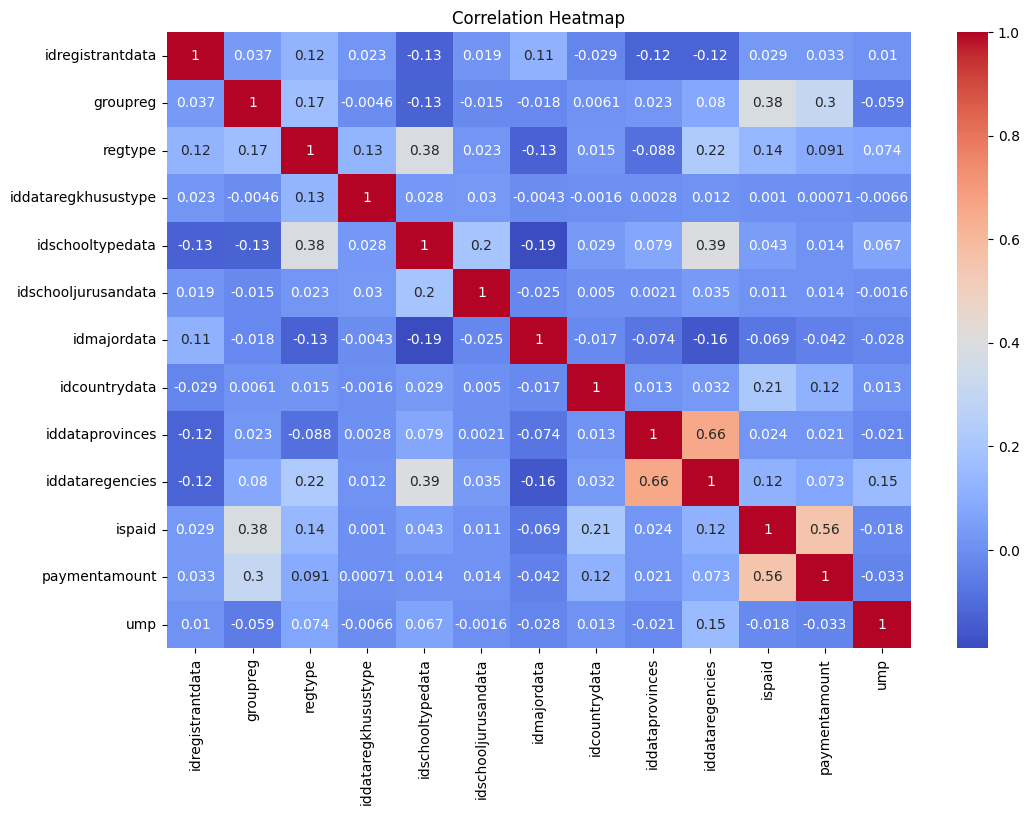

In [35]:
# Heatmap korelasi antar kolom numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [36]:
regtype_mapping = {
    1: "TEST EVENT (By City/Area)",
    2: "Jalur-1 TEST (Pre-Reg)",
    3: "Jalur-2 RAPOR",
    4: "Jalur-3 PRESTASI",
    5: "S-1 Profesional (Kelas Malam)",
    6: "S-1 Executive (Kelas Weekend)",
    7: "S-2-Graduate Program",
    8: "International (ASEAN",
    9: "International-1 (CHINA)",
    10: "Program-1 Social & Culture (Darmasiswa)",
    11: "Program-2 Short Term",
    12: "Program-3 Research Attacement",
    13: "Program-4 Internship",
    14: "Program-5 Special Assignment",
    15: "Jalur-4 ONLINE TEST",
    16: "Jalur-5 UTBK SBMPTN",
    17: "Jalur-6 Blended Learning",
    18: "Jalur Fast Track Program (Dual Degree)",
    19: "Jalur-7 UNBK",
    20: "Jalur-8 Khusus"
}

# Ubah nilai regtype dari angka ke nama

In [37]:
df['regtype_name'] = df['regtype'].map(regtype_mapping)

In [38]:
print(df[['regtype', 'regtype_name']].head())

   regtype            regtype_name
0        0                     NaN
1        2  Jalur-1 TEST (Pre-Reg)
2        2  Jalur-1 TEST (Pre-Reg)
3        2  Jalur-1 TEST (Pre-Reg)
4        2  Jalur-1 TEST (Pre-Reg)


C:\Users\najla\AppData\Local\Temp\ipykernel_34704\2725188504.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


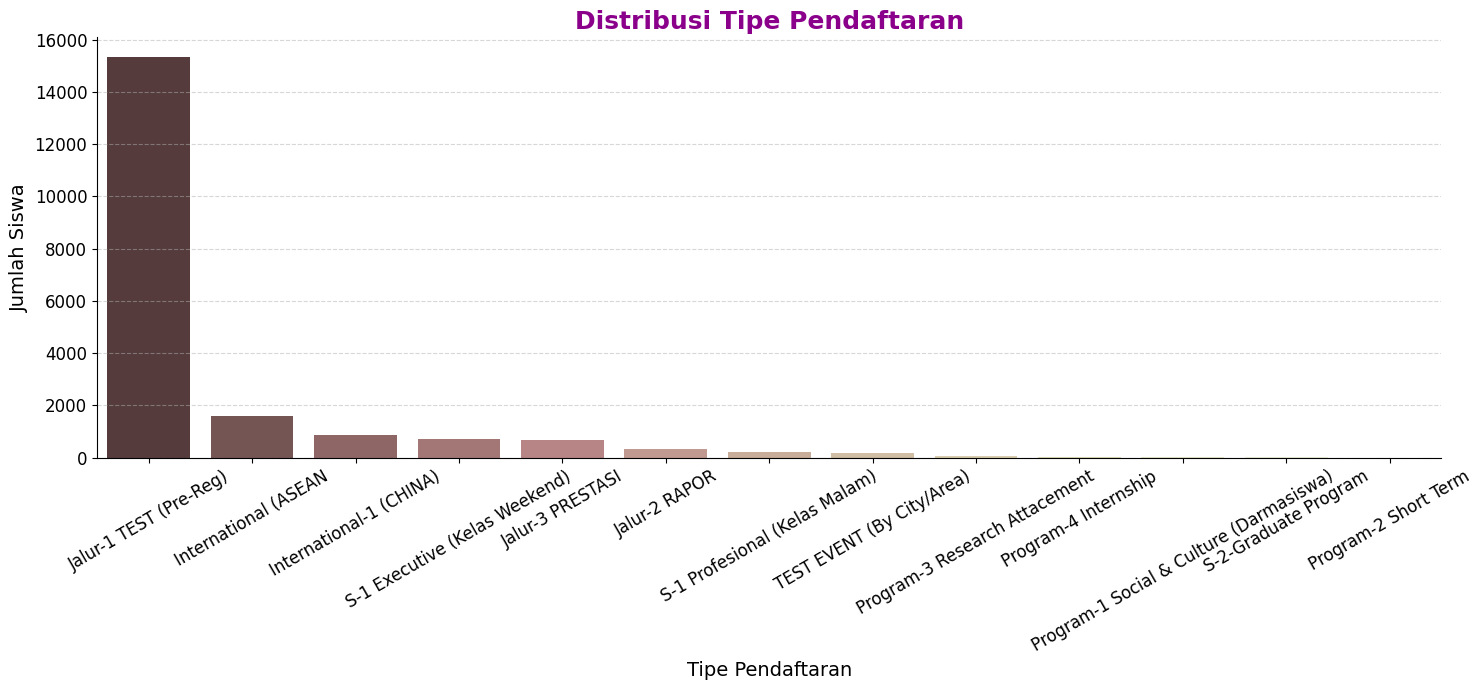

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Palet warna pink yang lembut (pakai seaborn palette)
num_categories = df['regtype_name'].nunique()
pink_palette = sns.color_palette("pink", num_categories)

# Plot dengan palet pink
sns.countplot(
    x='regtype_name',
    data=df,
    order=df['regtype_name'].value_counts().index,
    palette=pink_palette
)

# Styling tambahan agar lebih menarik
plt.title('Distribusi Tipe Pendaftaran', fontsize=18, fontweight='bold', color='darkmagenta')
plt.xlabel('Tipe Pendaftaran', fontsize=14)
plt.ylabel('Jumlah Siswa', fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Ubah ID type asal sekolah

C:\Users\najla\AppData\Local\Temp\ipykernel_34704\3612475745.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=schooltype_series, palette=pink_palette)


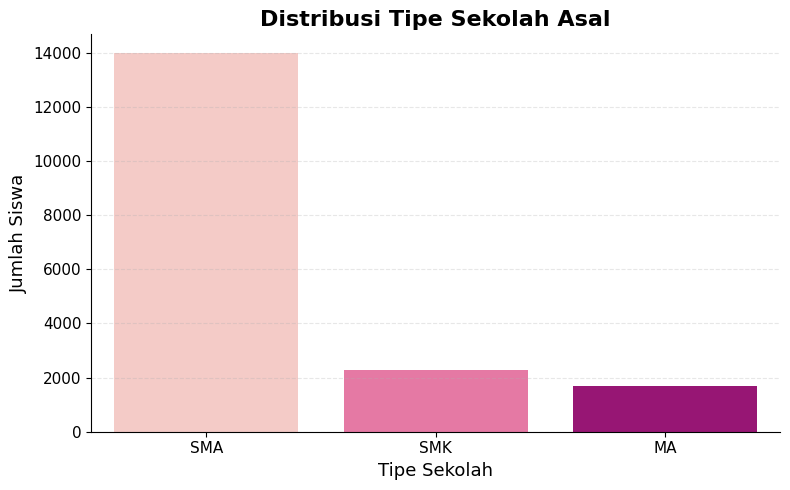

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping tipe sekolah
schooltype_mapping = {
    1: "SMA",
    2: "SMK",
    3: "MA",
    9: "Lainnya"
}

# Mapping kolom
schooltype_series = df['idschooltypedata'].map(schooltype_mapping)

# Membuat palet pink
unique_types = schooltype_series.nunique()
pink_palette = sns.color_palette("RdPu", unique_types)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=schooltype_series, palette=pink_palette)

# Styling
plt.title('Distribusi Tipe Sekolah Asal', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Tipe Sekolah', fontsize=13)
plt.ylabel('Jumlah Siswa', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


# Distribusi ispaid

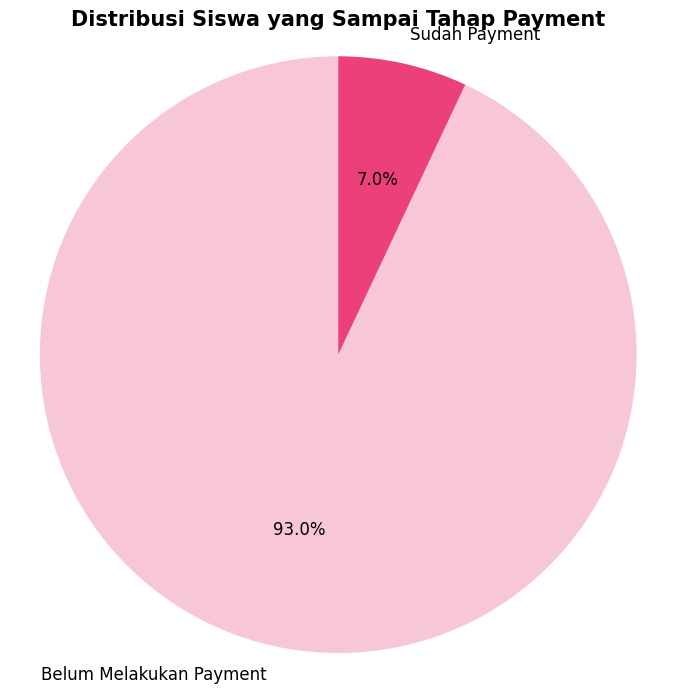

In [41]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kategori
payment_counts = df['ispaid'].value_counts()

# Label untuk pie chart
labels = ['Belum Melakukan Payment', 'Sudah Payment'] if 1 in payment_counts.index else ['Sudah Payment', 'Belum Melakukan Payment']

# Warna pink dan gradasinya
colors = ['#f7c6d9', '#ec407a']  # pastel pink dan pink cerah

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    payment_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Distribusi Siswa yang Sampai Tahap Payment', fontsize=15, fontweight='bold', color='black')
plt.axis('equal')  # Supaya bentuk lingkaran proporsional
plt.tight_layout()
plt.show()


# Merubah & Mapping data dari ID provinsi

In [42]:
print(df['iddataprovinces'].unique())

[31 32 33 73 72 13 12 16 35 36 18 53 15 94 76 51  0 71 11 63 14 17 61 21
 52 19 74 34 91 64 65 62 81 82 75]


In [43]:
province_mapping = {
    0: "Tidak Diketahui",
    11: "Aceh",
    12: "Sumatera Utara",
    13: "Sumatera Barat",
    14: "Riau",
    15: "Jambi",
    16: "Sumatera Selatan",
    17: "Bengkulu",
    18: "Lampung",
    19: "Kepulauan Bangka Belitung",
    21: "Kepulauan Riau",
    31: "DKI Jakarta",
    32: "Jawa Barat",
    33: "Jawa Tengah",
    34: "DI Yogyakarta",
    35: "Jawa Timur",
    36: "Banten",
    51: "Bali",
    52: "Nusa Tenggara Barat",
    53: "Nusa Tenggara Timur",
    61: "Kalimantan Barat",
    62: "Kalimantan Tengah",
    63: "Kalimantan Selatan",
    64: "Kalimantan Timur",
    65: "Kalimantan Utara",
    71: "Sulawesi Utara",
    72: "Sulawesi Tengah",
    73: "Sulawesi Selatan",
    74: "Sulawesi Tenggara",
    75: "Gorontalo",
    76: "Sulawesi Barat",
    81: "Maluku",
    82: "Maluku Utara",
    91: "Papua Barat",
    94: "Papua"
}


In [44]:
df['province_name'] = df['iddataprovinces'].astype(int).map(province_mapping)
df['jumlah_pendaftar'] = df['idregistrantdata']

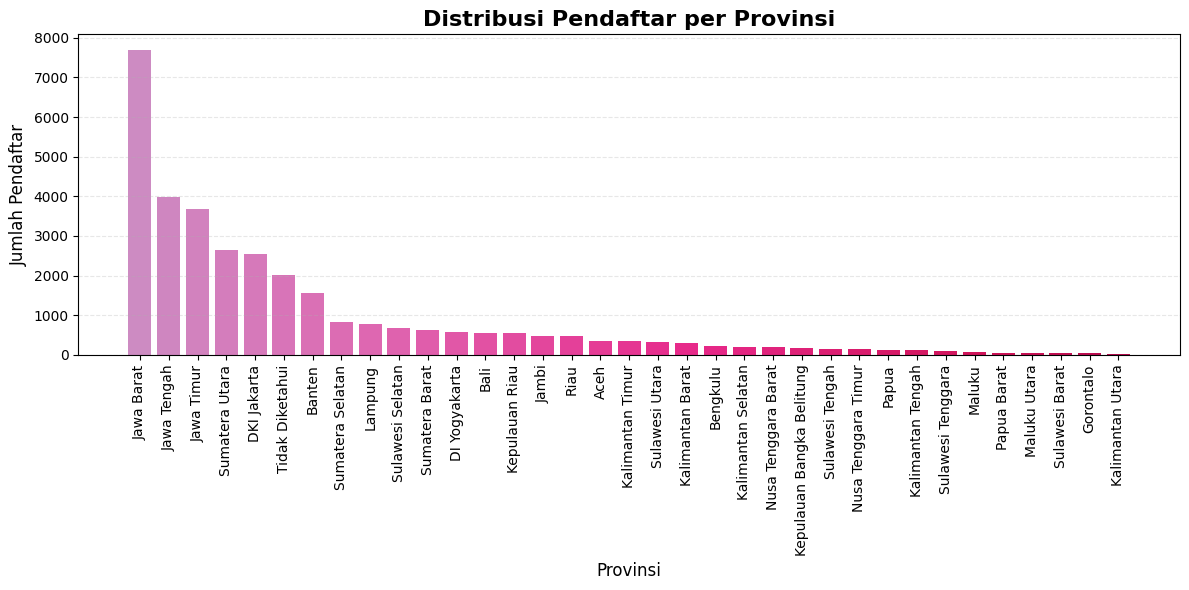

In [45]:
# Buat distribusi jumlah pendaftar per provinsi
df_distribution = df['province_name'].value_counts().reset_index()
df_distribution.columns = ['province_name', 'jumlah_pendaftar']

# Palet gradasi pink — buat jumlah warna sesuai jumlah provinsi
num_provinces = df_distribution.shape[0]
pink_palette = plt.cm.PuRd(np.linspace(0.4, 0.8, num_provinces))  # gradasi pink elegan

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_distribution['province_name'],
    df_distribution['jumlah_pendaftar'],
    color=pink_palette
)

# Styling
plt.title('Distribusi Pendaftar per Provinsi', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Pendaftar', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Mendistribusikan UMP per provinsi

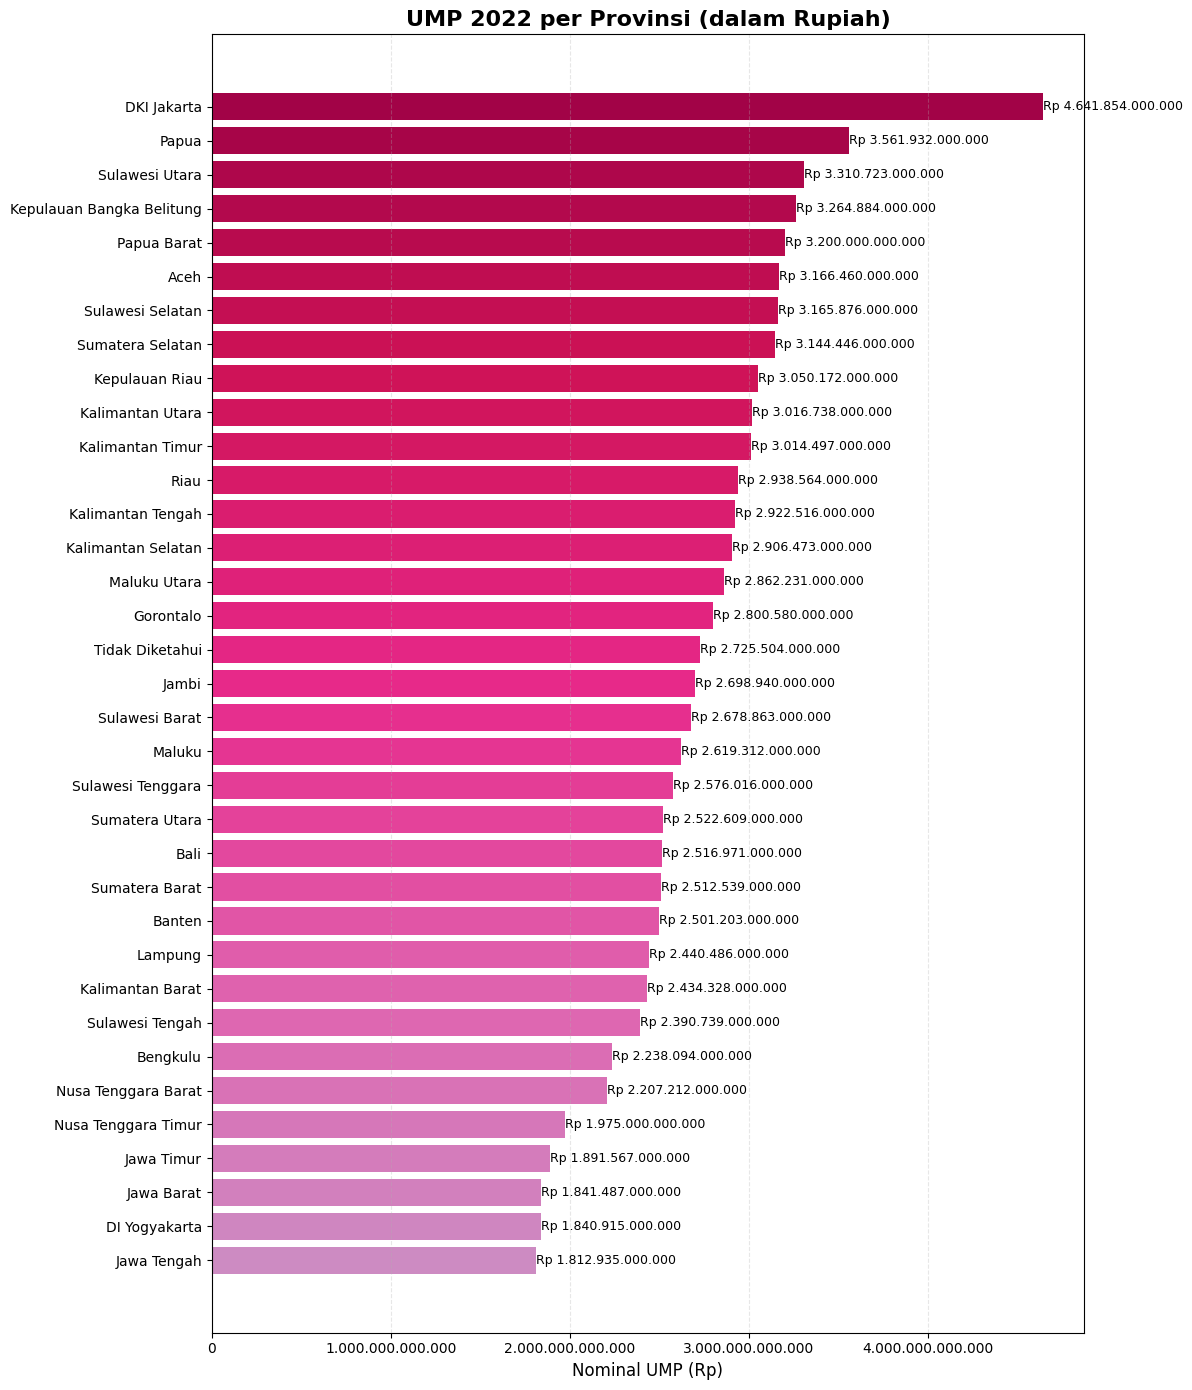

In [46]:
df['province_name'] = df['iddataprovinces'].map(province_mapping)
df['ump_rupiah'] = df['ump'] * 1_000_000

# Hitung rata-rata UMP
ump_per_province = df.groupby('province_name')['ump_rupiah'].mean().sort_values(ascending=True)

# Gradasi warna pink (dari terang ke tua)
colors = plt.cm.PuRd(np.linspace(0.4, 0.85, len(ump_per_province)))

# Visualisasi
plt.figure(figsize=(12, 14))
bars = plt.barh(ump_per_province.index, ump_per_province.values, color=colors)
plt.title('UMP 2022 per Provinsi (dalam Rupiah)', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Nominal UMP (Rp)', fontsize=12)

# Format sumbu X ke format rupiah
def rupiah_format(x, pos):
    return f"{int(x):,}".replace(",", ".")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(rupiah_format))

# Label nominal di ujung bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 25000, bar.get_y() + bar.get_height() / 2,
            f"Rp {int(width):,}".replace(",", "."), va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
